In [726]:
using Plots
using LinearAlgebra

In [727]:
F(U,t) = [-2*U[1]+U[1]*U[2], U[2]-U[1]*U[2]]

F (generic function with 3 methods)

In [728]:
function pred_corr(F,t0,x0,y0,h,N)
    t = zeros(N)
    U = zeros(N,2) 
    
    t[1] = t0
    U[[1],:] = [x0,y0]
    
    for i = 1:N-1
        t[i+1] = t[i] + h
        m1 = F(U[[i],:],t[i])
        m2 = F(U[[i],:] .+ transpose(h*m1), t[i])
        U[[i+1],:] = U[[i],:] + transpose(0.5*h*(m1 + m2))
    end
    return U,t
end

pred_corr (generic function with 1 method)

In [729]:
function plot_solution(f::Function,F::Function,t0,tf,x0,y0,h,flag)
    N = trunc(Int,tf/h)
    u,t = f(F,t0,x0,y0,h,N)
    if flag == "t"
        return t,u
    elseif flag == "pp"
        return u[:,1],u[:,2]
    end
end

plot_solution (generic function with 8 methods)

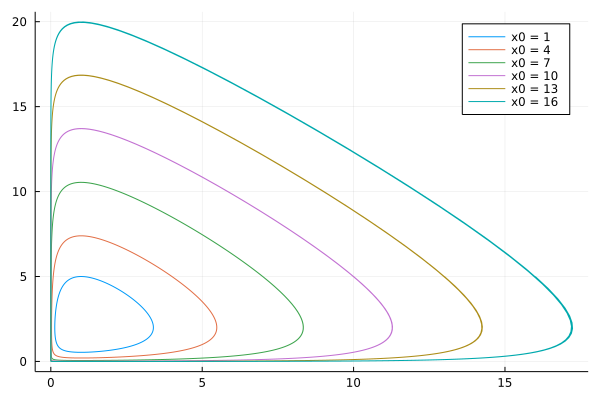

In [730]:
p = plot(plot_solution(pred_corr,F,0,50,1,5,0.01,"pp"),label = "x0 = 1")
for i=[4,7,10,13,16]
    plot!(p,plot_solution(pred_corr,F,0,50,i,5,0.01,"pp"),label = "x0 = "*string(i))
end
p

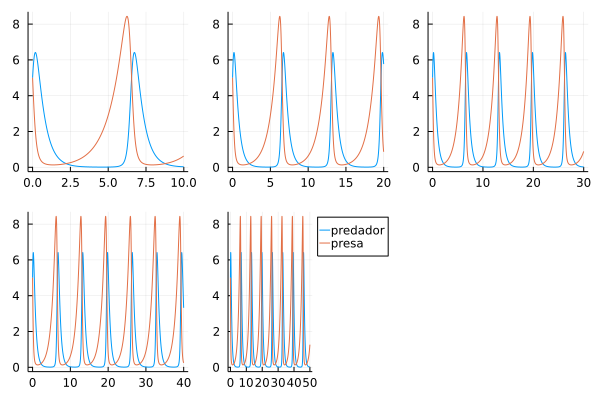

In [731]:
p1 = plot(plot_solution(pred_corr,F,0,10,5,5,0.01,"t"),legend= false)
p2 = plot(plot_solution(pred_corr,F,0,20,5,5,0.01,"t"),legend= false)
p3 = plot(plot_solution(pred_corr,F,0,30,5,5,0.01,"t"),legend= false)
p4 = plot(plot_solution(pred_corr,F,0,40,5,5,0.01,"t"),legend= false)
p5 = plot(plot_solution(pred_corr,F,0,50,5,5,0.01,"t"),label=["predador" "presa"],legend = :outertopright)
plot(p1,p2,p3,p4,p5)

In [732]:
function taylor(f,t0,x0,y0,h,N)
    t = zeros(N)
    U = zeros(N,2)
    
    J(u,v) = [v-2 u; 0 -u]
    
    U[[1],:] = [x0,y0]
    t[1] = t0
    
    for i=1:N-1
        t[i+1] = t[i] + h
        U[[i+1],:] = U[[i],:] .+ transpose(h*F(U[[i],:],t[i])) .+ transpose(0.5*(h^2)*J(U[i,1],U[i,2])*F(U[[i],:],t[i]))
    end
    return U,t
end

taylor (generic function with 1 method)

In [733]:
p = plot(plot_solution(taylor,F,0,50,1,5,0.001,"pp"),label = "x0 = 1")
for i=[4,7,10,13,16]
    plot!(p,plot_solution(taylor,F,0,50,i,5,0.001,"pp"),label = "x0 = "*string(i))
end
p

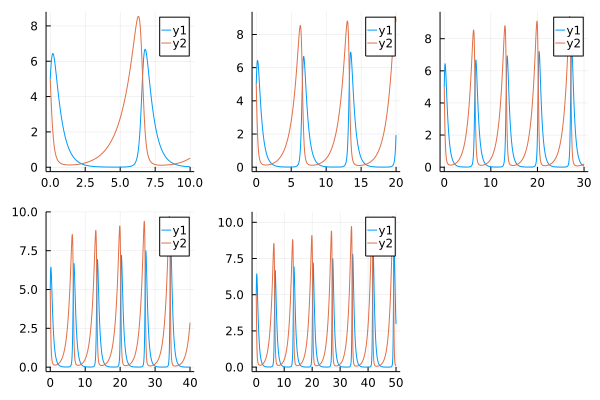

In [734]:
p1 = plot(plot_solution(taylor,F,0,10,5,5,0.01,"t"))
p2 = plot(plot_solution(taylor,F,0,20,5,5,0.01,"t"))
p3 = plot(plot_solution(taylor,F,0,30,5,5,0.01,"t"))
p4 = plot(plot_solution(taylor,F,0,40,5,5,0.01,"t"))
p5 = plot(plot_solution(taylor,F,0,50,5,5,0.01,"t"))
plot(p1,p2,p3,p4,p5)

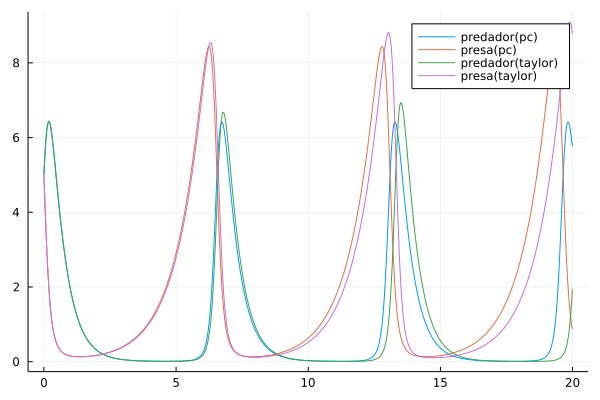

In [735]:
plot(plot_solution(pred_corr,F,0,20,5,5,0.01,"t"),label=["predador(pc)" "presa(pc)"])
plot!(plot_solution(taylor,F,0,20,5,5,0.01,"t"),label=["predador(taylor)" "presa(taylor)"])

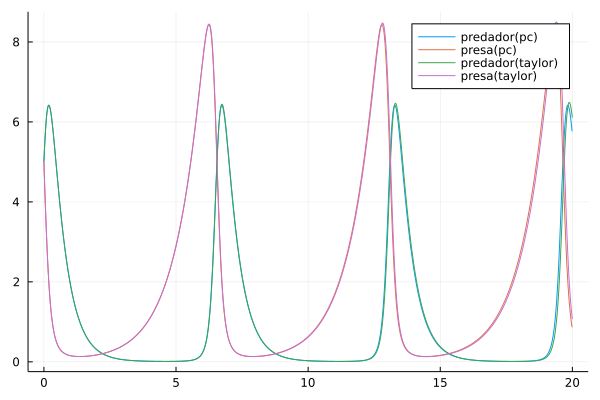

In [736]:
plot(plot_solution(pred_corr,F,0,20,5,5,0.01,"t"),label=["predador(pc)" "presa(pc)"])
plot!(plot_solution(taylor,F,0,20,5,5,0.001,"t"),label=["predador(taylor)" "presa(taylor)"])

In [737]:
G(U,Un,h) = [U[1]-0.5*h*(-2*U[1]+U[1]*U[2])-Un[1]-0.5*h*(-2*Un[1]+Un[1]*Un[2]),U[2]-0.5*h*(U[2]-U[1]*U[2])-Un[2]-0.5*h*(Un[2]-Un[1]*Un[2])]
J(U,h) = [1+h-0.5*h*U[2] -0.5*U[1] ; 0.5*h*U[2] 1-h/2+0.5*h*U[1]] 

#G(U,Un,h) = U[[1],:] .- 0.5*h*[-2*U[1]+U[1]*U[2] , U[2]-U[1]*U[2]] .- Un[[1],:] .- 0.5*h*[-2*Un[1]+Un[1]*Un[2] , Un[2]-Un[1]*Un[2]]
#G([1,1],[1,1],1)

J (generic function with 2 methods)

In [748]:
function newton(J,G,t0,x0,y0,h,N)
    t = zeros(N)
    U = zeros(N,2)
    Un = zeros(N,2)
    
    U[[1],:] = [x0,y0]
    Un[[1],:] = [x0,y0]
    
    t[1] = t0
    un = [x0,y0]
    while dot(U[i+1]-U[i]) > 10^(-10)
         x = un
        for i=1:N-1
            j = J(x,h)
            g = G(x,un,h)
            δ = j\g
            x = x .- transpose(δ) 
        end
        t[i+1] = t[i] + h
        U[i+1] = x
        un = x
    end
    return t,U
end

newton (generic function with 1 method)

In [749]:
t0 = 0
x0 = 5
y0 = 5
N = 10^5
h = 50/N

t,u = newton(J,G,t0,x0,y0,h,N)

LoadError: UndefVarError: i not defined

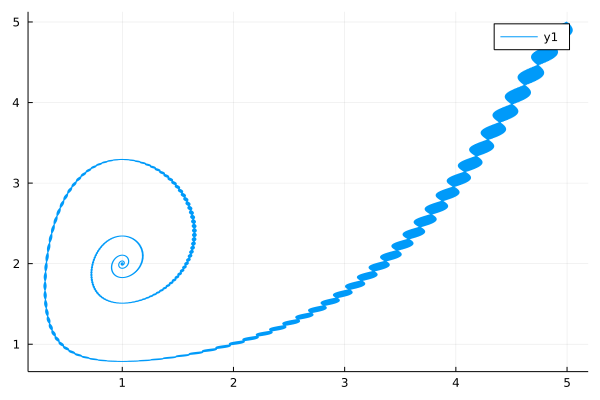

In [720]:
plot(u[:,1],u[:,2])